<a href="https://colab.research.google.com/github/mayurimagdum/MachineLearning/blob/master/Stock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
data_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
train = data_train.iloc[:, 1:2].values


In [0]:
# preprocessing 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train)

In [0]:
# Creating data structure with 60 times
X_train = []
y_train = []

for i in range( 60, len(train_scaled)):
  X_train.append(train_scaled[i-60:i, 0])
  y_train.append(train_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)


In [0]:
# Reshaping 

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [0]:
# Building RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initialization RNN

reg = Sequential()
reg.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

reg.add(Dense(units= 1))

# Compiling RNN

reg.compile(optimizer= 'adam' , loss = 'mean_squared_error')

# fitting RNN to training set

reg.fit(X_train, y_train, epochs= 100 , batch_size= 32)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 24s 20ms/step - loss: 0.0649
Epoch 2/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [=============

In [0]:
# Making the predictions 

test_data = pd.read_csv('/content/Google_Stock_Price_Test.csv')
open_stock_data = test_data.iloc[: , 1:2].values

# Getting predicted stock values for 2017

dataset_total = pd.concat((data_train['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range (60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock = reg.predict(X_test)
predicted_stock = sc.inverse_transform(predicted_stock)




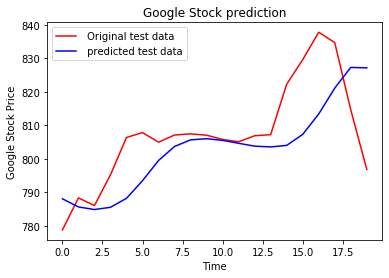

In [14]:
## Visualing Results 

plt.plot( open_stock_data,color = 'red', label = ' Original test data')
plt.plot(predicted_stock, color = 'blue', label = ' predicted test data')
plt.title('Google Stock prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
